In [1]:
import pandas as pd
import pyreadstat as st
import pingouin as pg
import numpy as np

path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\MECMT04\problem_set_2\ine.dta"

df, meta = st.read_dta(path)
df.columns = [f"v{i}" for i in range(1, len(df.columns)+1)]
df.head(5)

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12
0,Andalucía,4061.229980,1598.060059,7090.200195,1196.560059,563.429993,2963.260010,667.609985,1253.819946,180.100006,2185.179932,1282.459961
1,Aragón,4108.740234,1744.599976,8370.150391,1249.680054,501.700012,2404.870117,653.630005,1689.650024,218.309998,2324.850098,1389.199951
2,Asturias(Principado de),3644.649902,1725.589966,6449.290039,1051.199951,518.500000,2379.080078,715.820007,1459.949951,245.979996,2103.409912,1639.849976
3,Balears (Illes),3406.590088,1318.329956,9575.309570,1420.140015,463.200012,2813.129883,744.380005,1591.869995,251.330002,2150.370117,1925.890015
4,Canarias,3768.629883,1262.180054,7233.129883,962.669983,730.369995,2926.860107,721.049988,1397.410034,209.410004,1958.500000,1210.300049


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v1      18 non-null     object 
 1   v2      18 non-null     float64
 2   v3      18 non-null     float64
 3   v4      18 non-null     float64
 4   v5      18 non-null     float64
 5   v6      18 non-null     float64
 6   v7      18 non-null     float64
 7   v8      18 non-null     float64
 8   v9      18 non-null     float64
 9   v10     18 non-null     float64
 10  v11     18 non-null     float64
 11  v12     18 non-null     float64
dtypes: float64(11), object(1)
memory usage: 1.8+ KB


In [6]:
# Henze-Zirkler multivariate normality test. NO MARIA

# ndf = df.iloc[:,1:].values
# mardia_test = pg.multivariate_normality(ndf, alpha=0.05)
# mardia_test

HZResults(hz=0.9871703422961233, pval=0.04100544870109557, normal=False)

In [76]:
import numpy as np
import scipy.stats as stats

def mardia_test(data: np.ndarray, cov: bool = True):
    """
    Mardia's multivariate skewness and kurtosis.
    Calculates the Mardia's multivariate skewness and kurtosis coefficients
    as well as their corresponding statistical test. For large sample size
    the multivariate skewness is asymptotically distributed as a Chi-square
    random variable; here it is corrected for small sample size. However,
    both uncorrected and corrected skewness statistic are presented. Likewise,
    the multivariate kurtosis it is distributed as a unit-normal.

     Syntax: function [Mskekur] = Mskekur(X,c,alpha)

     Inputs:
          X - multivariate data matrix [Size of matrix must be n(data)-by-p(variables)].
          cov - boolean to whether to normalize the covariance matrix by n (c=1[default]) or by n-1 (c~=1)

     Outputs:
          - skewness test statistic
          - kurtosis test statistic
          - significance value for skewness
          - significance value for kurtosis
    """
    n, p = data.shape

    if cov:
        S = ((n - 1)/n) * np.cov(data.T)
    else:
        S = np.cov(data.T)

    # calculate mean
    data_mean = data.mean(axis=0)
    
    # inverse - check if singular matrix
    try:
        iS = np.linalg.inv(S)
    except Exception as e:
        # print for now
        print(e)
        return 0.0, 0.0, 0.0, 0.0
    
    # squared-Mahalanobis' distances matrix
    D: np.ndarray = (data - data_mean) @ iS @ (data - data_mean).T
    
    # multivariate skewness coefficient
    msc: float = np.sum(D**3)/n**2
    # multivariate kurtosis coefficient
    mkc: float = np.trace(D**2)/n

    # degrees of freedom
    df: float = (p * (p + 1) * (p + 2))/6

    # skewness test statistic corrected for small sample: it approximates to a chi-square distribution
    g_skew = ((p + 1)*(n + 1)*(n + 3))/(6*(((n + 1)*(p + 1)) - 6)) * msc 
    # significance value associated to the skewness corrected for small sample
    p_skew: float = 1.0 - stats.chi2.cdf(g_skew, df)

    # kurtosis test statistic: it approximates to a unit-normal distribution
    g_kurt = (mkc - (p*(p + 2)))/(np.sqrt((8 * p * (p + 2))/n))
    # significance value associated to the kurtosis
    p_kurt: float = 2 * (1.0 - stats.norm.cdf(np.abs(g_kurt)))

     # Mostrar resultados en formato de tabla
    print("====================================================================")
    print("                     Mardia's Test Results                          ")
    print("--------------------------------------------------------------------")
    print("       Termino            Coeficiente      Estadístico       P-valor")
    print("--------------------------------------------------------------------")
    print(f"Skewness Coefficient       {msc:<18.4f}{g_skew:<12.4f}     {p_skew:<12.4f}")
    print(f"Kurtosis Coefficient       {mkc:<18.4f}{g_kurt:<12.4f}     {p_kurt:<12.4f}")
    print("====================================================================")

In [77]:
ndf = df.iloc[:, 1:]
mardia_test(ndf.values)

                     Mardia's Test Results                          
--------------------------------------------------------------------
       Termino            Coeficiente      Estadístico       P-valor
--------------------------------------------------------------------
Skewness Coefficient       84.0333           302.0658         0.2459      
Kurtosis Coefficient       130.2492          -1.5994          0.1097      


In [75]:
hotelling = pg.multivariate_ttest(ndf)

print(hotelling)

                   T2          F  df1  df2      pval
hotelling  1894.51284  70.917593   11    7  0.000004


In [76]:
from scipy.stats import f

# Supongamos que tus datos están en un DataFrame llamado df y seleccionas algunas columnas
ndf = df.iloc[:, 1:].values  # Por ejemplo, las columnas 1 en adelante

# Número de observaciones y dimensiones
n, p = ndf.shape

# Media de los datos
mean = np.mean(ndf, axis=0)

# Matriz de covarianza
cov_matrix = np.cov(ndf, rowvar=False)

# Inversa de la matriz de covarianza
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Vector de referencia (en este caso, un vector de ceros)
mean_ref = np.zeros(p)

# Hotelling T²
diff_mean = mean - mean_ref
T2 = n * (diff_mean @ inv_cov_matrix @ diff_mean)

# Valor p y estadístico F
F_stat = (n - p) / (p * (n - 1)) * T2
p_value = 1 - f.cdf(F_stat, p, n - p)

print(f"Hotelling T²: {T2}")
print(f"F-statistic: {F_stat}")
print(f"P-value: {p_value}")

Hotelling T²: 1894.512840114513
F-statistic: 70.91759294546304
P-value: 4.258079427721384e-06


In [77]:
# Número de observaciones y dimensiones
n, p = ndf.shape

# Media de los datos
mean = np.mean(ndf, axis=0)

# Matriz de covarianza
cov_matrix = np.cov(ndf, rowvar=False)

# Inversa de la matriz de covarianza
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Cálculo de Mardia Skewness
skewness = 0
for i in range(n):
    for j in range(n):
        diff_i = ndf[i] - mean
        diff_j = ndf[j] - mean
        skewness += (diff_i @ inv_cov_matrix @ diff_j) ** 3
skewness = skewness / (n**2)

# Cálculo de Mardia Kurtosis
kurtosis = 0
for i in range(n):
    diff = ndf[i] - mean
    kurtosis += (diff @ inv_cov_matrix @ diff) ** 2
kurtosis = kurtosis / n

# Ajuste de Mardia Kurtosis a la kurtosis teórica
mardia_kurtosis = kurtosis - p * (p + 2)

print("Mardia Skewness:", skewness)
print("Mardia Kurtosis:", mardia_kurtosis)

Mardia Skewness: 70.79145500432523
Mardia Kurtosis: -26.82091077012946


In [78]:
np.random.seed(123)

# Definir las medias y desviaciones estándar
means = [2, 0.45, 0.23, 0.54, 0.12, 0.63, 0.66, 0.32]
sds = [0.67, 0.89, 0.56, 0.9, 0.56, 0.34, 0.76, 0.13]

# Número de observaciones
n = 100

# Crear una matriz de covarianza diagonal (solo varianzas)
cov_matrix = np.diag(np.array(sds) ** 2)

# Generar datos multivariados normales
data = np.random.multivariate_normal(mean=means, cov=cov_matrix, size=n)

# Convertir a DataFrame para facilidad de uso
nmv = pd.DataFrame(data, columns=[f'x{i+1}' for i in range(len(means))])

nmv.head()

,x1,x2,x3,x4,x5,x6,x7,x8
0,0.990783,1.337637,1.154804,-0.437068,-0.204016,-0.195071,0.875064,0.264241
1,1.936545,-0.321399,-0.127785,1.679343,0.955178,0.479046,0.144047,0.263534
2,2.258745,2.396240,1.064810,2.525337,0.532926,0.311816,1.423081,0.472858
3,1.042784,-0.117599,-0.252583,-0.588493,0.041562,0.543089,1.349400,-0.043817
4,1.883664,-0.172891,0.615405,-1.054380,0.121594,0.330958,1.364871,0.356872


In [79]:
nmv.describe()

,x1,x2,x3,x4,x5,x6,x7,x8
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1.962428,0.436240,0.230111,0.650156,0.094989,0.606612,0.582886,0.319259
std,0.725163,0.820137,0.570753,0.926894,0.486165,0.382732,0.811528,0.125048
min,-0.164807,-1.825779,-0.948760,-1.472776,-1.444904,-0.199077,-1.458966,-0.043817
25%,1.549154,-0.127717,-0.153938,0.046152,-0.252558,0.342781,0.082248,0.241961
50%,1.925539,0.453213,0.207218,0.639744,0.075523,0.597796,0.685768,0.318047
75%,2.449053,0.950325,0.583840,1.405922,0.451272,0.890550,1.035602,0.409964
max,4.392958,2.441948,1.381622,2.565608,1.096479,1.500349,2.432367,0.657780


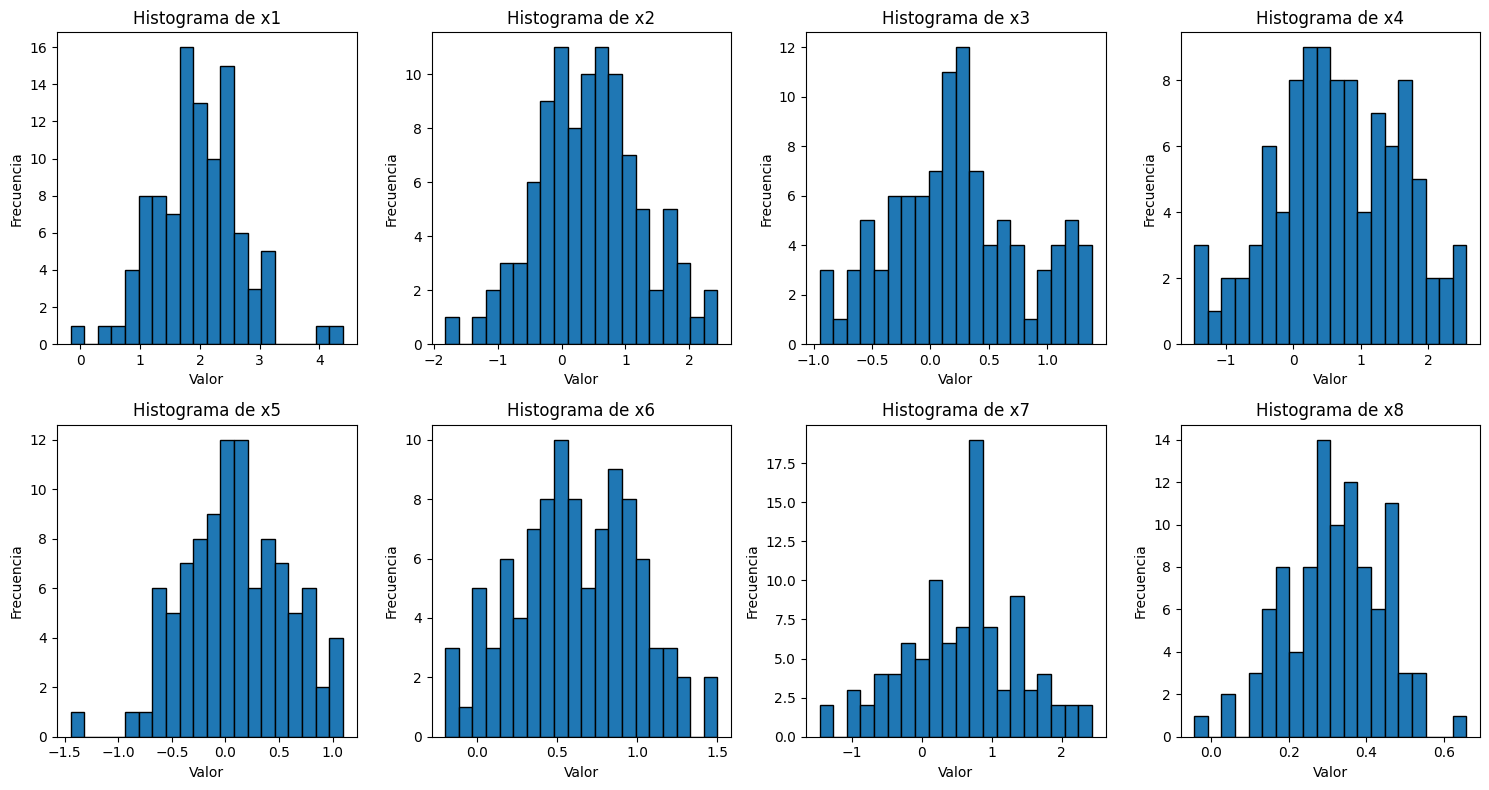

In [80]:
import matplotlib.pyplot as plt

# Crear una figura con 8 subgráficas (2x4)
fig, axs = plt.subplots(2, 4, figsize=(15, 8))

# Aplanar el array de ejes para facilitar el acceso
axs = axs.flatten()

# Iterar sobre las columnas del DataFrame y los ejes
for i, col in enumerate(nmv.columns):
    axs[i].hist(nmv[col], bins=20, edgecolor='black')
    axs[i].set_title(f'Histograma de {col}')
    axs[i].set_xlabel('Valor')
    axs[i].set_ylabel('Frecuencia')

# Ajustar el layout para que no se sobrepongan los títulos
plt.tight_layout()

# Mostrar los histogramas
plt.show()

In [81]:
import scipy.stats as stats

# Suponiendo que df es tu DataFrame con las variables generadas
results = {}

# Iterar sobre cada columna del DataFrame
for col in nmv.columns:
    # Calcular asimetría (skewness)
    skewness = stats.skew(nmv[col])
    
    # Calcular kurtosis
    kurtosis = stats.kurtosis(nmv[col])
    
    # Almacenar resultados en un diccionario
    results[col] = {'Skewness': skewness, 'Kurtosis': kurtosis}

# Convertir los resultados a un DataFrame para mejor visualización
results_df = pd.DataFrame(results).T

results_df

,Skewness,Kurtosis
x1,0.218746,0.993028
x2,0.084773,-0.033896
x3,0.140791,-0.559001
x4,-0.112334,-0.515792
x5,-0.089257,-0.055584
x6,-0.042692,-0.527124
x7,-0.142173,-0.175082
x8,-0.179341,-0.025168


In [82]:
hotelling = pg.multivariate_ttest(nmv)

print(hotelling)

                    T2           F  df1  df2          pval
hotelling  1822.917268  211.753016    8   92  8.818816e-56


In [83]:
# Supongamos que tus datos están en un DataFrame llamado nmv
nmv = nmv.values  # Convertir a array NumPy si es necesario

# Número de observaciones y dimensiones
n, p = nmv.shape

# Media de los datos
mean = np.mean(nmv, axis=0)

# Vector de referencia (en este caso, un vector de ceros)
mean_ref = np.zeros(p)

# Matriz de covarianza
cov_matrix = np.cov(nmv, rowvar=False)

# Inversa de la matriz de covarianza
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Hotelling T²
diff_mean = mean - mean_ref
T2 = n * (diff_mean @ inv_cov_matrix @ diff_mean)

# Valor p y estadístico F
F_stat = (n - p) / (p * (n - 1)) * T2
p_value = 1 - f.cdf(F_stat, p, n - p)

print(f"Hotelling T²: {T2}")
print(f"F-statistic: {F_stat}")
print(f"P-value: {p_value}")

Hotelling T²: 1822.9172677340657
F-statistic: 211.7530159489066
P-value: 1.1102230246251565e-16


In [ ]:
# import numpy as np
# import scipy.stats as stats

# from typing import Tuple


# # * * * STATISTICAL TESTS * * *

# def mardia_test(data: np.ndarray, cov: bool = True) -> Tuple[float, float, float, float]:
#     """
#     https://rdrr.io/cran/MVN/src/R/mvn.R
#     https://stats.stackexchange.com/questions/317147/how-to-get-a-single-p-value-from-the-two-p-values-of-a-mardias-multinormality-t
#     Mardia's multivariate skewness and kurtosis.
#     Calculates the Mardia's multivariate skewness and kurtosis coefficients
#     as well as their corresponding statistical test. For large sample size
#     the multivariate skewness is asymptotically distributed as a Chi-square
#     random variable; here it is corrected for small sample size. However,
#     both uncorrected and corrected skewness statistic are presented. Likewise,
#     the multivariate kurtosis it is distributed as a unit-normal.

#      Syntax: function [Mskekur] = Mskekur(X,c,alpha)

#      Inputs:
#           X - multivariate data matrix [Size of matrix must be n(data)-by-p(variables)].
#           cov - boolean to whether to normalize the covariance matrix by n (c=1[default]) or by n-1 (c~=1)

#      Outputs:
#           - skewness test statistic
#           - kurtosis test statistic
#           - significance value for skewness
#           - significance value for kurtosis
#     """
#     n, p = data.shape

#     # correct for small sample size
#     small: bool = True if n < 20 else False

#     if cov:
#         S = ((n - 1)/n) * np.cov(data.T)
#     else:
#         S = np.cov(data.T)

#     # calculate mean
#     data_mean = data.mean(axis=0)
#     # inverse - check if singular matrix
#     try:
#         iS = np.linalg.inv(S)
#     except Exception as e:
#         # print for now
#         print(e)
#         return 0.0, 0.0, 0.0, 0.0
#     # squared-Mahalanobis' distances matrix
#     D: np.ndarray = (data - data_mean) @ iS @ (data - data_mean).T
#     # multivariate skewness coefficient
#     g1p: float = np.sum(D**3)/n**2
#     # multivariate kurtosis coefficient
#     g2p: float = np.trace(D**2)/n
#     # small sample correction
#     k: float = ((p + 1)*(n + 1)*(n + 3))/(n*(((n + 1)*(p + 1)) - 6))
#     # degrees of freedom
#     df: float = (p * (p + 1) * (p + 2))/6

#     if small:
#         # skewness test statistic corrected for small sample: it approximates to a chi-square distribution
#         g_skew = (n * g1p * k)/6
#     else:
#         # skewness test statistic:it approximates to a chi-square distribution
#         g_skew = (n * g1p)/6

#     # significance value associated to the skewness corrected for small sample
#     p_skew: float = 1.0 - stats.chi2.cdf(g_skew, df)

#     # kurtosis test statistic: it approximates to a unit-normal distribution
#     g_kurt = (g2p - (p*(p + 2)))/(np.sqrt((8 * p * (p + 2))/n))
#     # significance value associated to the kurtosis
#     p_kurt: float = 2 * (1.0 - stats.norm.cdf(np.abs(g_kurt)))

#     return g_skew, g_kurt, p_skew, p_kurt


# def hz_test(data: np.ndarray, cov: bool = True) -> Tuple[float, float]:
#     """
#     Henze-Zirkler method for goodness of fit of data to a multivariate normal distribution.
#     Researchers tend to use this MVN test for larger samples (N > 100).
#     https://www.tandfonline.com/doi/abs/10.1080/03610929008830400

#     :param data: multivariate data matrix [Size of matrix must be n(data)-by-p(variables)].
#     :param cov: boolean to whether to normalize the covariance matrix by n (c=1[default]) or by n-1 (c~=1)
#     :return:
#         HZ - Henze-Zirkler test statistic
#         p_value - significance value
#     """
#     n, p = data.shape

#     if cov:
#         S = ((n - 1)/n) * np.cov(data.T)
#     else:
#         S = np.cov(data.T)

#     # calculate mean
#     data_mean = data.mean(axis=0)

#     try:
#         iS = np.linalg.inv(S)
#     except Exception as e:
#         print(e)
#         return 0.0, 0.0

#     Y = data @ iS @ data.T
#     Dj = np.diag((data - data_mean) @ iS @ (data - data_mean).T)

#     Djk = - 2 * Y.T + np.tensordot(np.diag(Y.T), np.ones(n), axes=0) + np.tensordot(np.ones(n), np.diag(Y.T), axes=0)
#     b: float = 1 / (np.sqrt(2)) * ((2 * p + 1) / 4) ** (1 / (p + 4)) * (n ** (1 / (p + 4)))

#     # calculate rank of matrix
#     S_rank = np.linalg.matrix_rank(S)

#     if S_rank == p:
#         HZ = n * (1 / (n ** 2) * np.sum(np.sum(np.exp(- (b ** 2) / 2 * Djk))) - 2 * ((1 + (b ** 2)) ** (- p / 2)) * (1 / n) * (np.sum(np.exp(- ((b ** 2) / (2 * (1 + (b ** 2)))) * Dj))) + ((1 + (2 * (b ** 2))) ** (- p / 2)))
#     else:
#         HZ = n * 4

#     wb = (1 + b ** 2) * (1 + 3 * b ** 2)
#     a = 1 + 2 * b ** 2

#     # HZ mean
#     mu = 1 - a ** (- p / 2) * (1 + p * b ** 2 / a + (p * (p + 2) * (b ** 4)) / (2 * a ** 2))  # HZ mean

#     # HZ variance
#     si2 = 2 * (1 + 4 * b ** 2) ** (- p / 2) + 2 * a ** (- p) * (1 + (2 * p * b ** 4) / a ** 2 + (3 * p * (p + 2) * b ** 8) / (4 * a ** 4)) - 4 * wb ** (- p / 2) * (1 + (3 * p * b ** 4) / (2 * wb) + (p * (p + 2) * b ** 8) / (2 * wb ** 2))

#     pmu = np.log(np.sqrt(mu ** 4 / (si2 + mu ** 2)))  # lognormal HZ mean
#     psi = np.sqrt(np.log((si2 + mu ** 2) / mu ** 2))  # lognormal HZ standard deviation

#     # calculate p-value
#     p_value = 1.0 - stats.lognorm.cdf(HZ, psi, scale=np.exp(pmu))

#     return HZ, p_value

# def royston_test(data: np.ndarray, cov: bool = True) -> Tuple[float, float]:
#     """

#     Royston’s test uses the Shapiro-Wilk/Shapiro-Francia statistic to test multivariate normality. If kurtosis
#     of the data is greater than 3, then it uses the Shapiro-Francia test for leptokurtic distributions, otherwise
#     it uses the Shapiro-Wilk test for platykurtic distributions (Shapiro and Wilk, 1964; Royston, 1982, 1983,
#     1992; Johnson and Wichern, 1992; Royston, 1995; Mecklin and Mundfrom, 2005).

#     Researchers tend to use this MVN test for small samples (N <= 30).

#     :param data: multivariate data matrix [Size of matrix must be n(data)-by-p(variables)].
#     :param cov: boolean to whether to normalize the covariance matrix by n (c=1[default]) or by n-1 (c~=1)
#     :return:
#         R - Royston test statistic
#         p_value - significance value
#     """
#     # todo - implement function

#     n, p = data.shape

#     if cov:
#         S = ((n - 1)/n) * np.cov(data.T)
#     else:
#         S = np.cov(data.T)

#     R: float = 0.0
#     p_value: float = 0.0
#     return R, p_value